In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# PART I

## Simple functions

+ Write a function called **`palindrome`** that will take any list and decide whether or not is a palindrome. (A palindrome is something that is the same read forwards or backwards like "RACECAR").  

In [10]:
import copy

def palindrome(a_list):
    """
    Determine whether a list is a palindrome.
    """
    
    a_list = list(a_list)
    
    b_list = copy.deepcopy(a_list)
    b_list.reverse()
    for i in range(len(a_list)):
        if a_list[i] != b_list[i]:
            return False
    
    return True
    

+ Write a function called **`prime`** that determines whether an integer number is prime. (Hint: you might want to use the [modulo operator](http://stackoverflow.com/questions/4432208/how-does-work-in-python))

In [12]:
def prime(number):
    """
    Determine if the number is prime.
    """
    
    # Start at 2 because a prime is only divisible by 1 and itself. 
    for i in range(2,number):
        if number % i == 0:
            return False
    return True

 + Write a function called **`reverse_complement`** that returns the reverse complement of any DNA sequence.

In [14]:
def reverse_complement(dna):
    
    converter = {"A":"T",
                 "T":"A",
                 "C":"G",
                 "G":"C"}
    
    output = []
    for d in dna:
        output.append(converter[d])
    output.reverse()
    
    return "".join(output)

## Battle Royale

In a distant, war-torn land, there are 10 castles. There are two warlords: you and your archenemy. Each castle has its own strategic value for a would-be conqueror. Specifically, the castles are worth 1, 2, 3, …, 9, and 10 victory points. You and your enemy each have 100 soldiers to distribute, any way you like, to fight at any of the 10 castles. Whoever sends more soldiers to a given castle conquers that castle and wins its victory points. If you each send the same number of troops, you split the points. You don’t know what distribution of forces your enemy has chosen until the battles begin. Whoever wins the most points wins the war.

Create a list called **battle_plan** that distributes your 100 soldiers among the 10 castles. Once I receive all your battle plans, I’ll adjudicate all the possible one-on-one matchups. Whoever wins the most wars wins the battle royale and is crowned king or queen of, er, something.

Source: [fivethirtyeight](https://fivethirtyeight.com/features/can-you-rule-riddler-nation/)

In [21]:
def head_to_head(a_soldiers,b_soldiers):
    """
    Calculate the score for a battle between the a and b soldier
    arrangements. 
    """
    
    points = np.arange(1,11)
    
    a = np.array(a_soldiers)
    b = np.array(b_soldiers)
    
    a_points = np.sum(points[np.array(a > b)])
    b_points = np.sum(points[np.array(a < b)])
    
    if a_points > b_points:
        return a_soldiers
    elif a_points < b_points:
        return b_soldiers
    else:
        return None

    
def gen_armies(army_type=None):
    """
    Randomly generate armies by a variety of strategies.  
    """
    
    # Generate initial weights
    if army_type == "exp":
        armies = np.exp(np.random.random()*np.arange(10))
    elif army_type == "flat":
        armies = np.random.rand(10)
    elif army_type == "flat_sorted":
        armies = np.random.rand(10)
        armies.sort()
    elif army_type == "comb":
        armies = np.sin(np.arange(10)/np.random.random()) + 1        
    else:
        armies = np.ones(10)
    
    # round off so armies now have 100 soldiers, distributed 
    # according to weights above
    armies = armies/np.sum(armies)        
    armies = np.round(armies*100,0)
    
    # Trim to deal with numerical errors in round call above
    if np.sum(armies) > 100:
        armies[9] = armies[9] - (np.sum(armies) - 100)
    if np.sum(armies) < 100:
        armies[9] = armies[9] + (100 - np.sum(armies))
        
    return np.array(armies,dtype=np.int)

strategies = ["exp","flat","flat_sorted","comb"]

# Create initial winner
winner_strategy = np.random.choice(strategies)
winner = gen_armies(winner_strategy)

# Run 1,000,000 times 
out = {}
for i in range(1000000):
    
    # Create a challenger
    challenger_strategy = np.random.choice(strategies)
    challenger = gen_armies(challenger_strategy)

    # Do battle
    result = head_to_head(winner,challenger)
    
    # Replace winner if there is a new winner
    if result is not None:
        if not np.array_equal(winner,result):
            winner = np.copy(result)
            winner_strategy = challenger_strategy
    
    # Count the winners
    try:
        out[tuple(winner)] += 1
    except KeyError:
        out[tuple(winner)] = 1


# Sort output and print out top 50 most common solutions
sorted_out = [(out[k],k) for k in out.keys()]
sorted_out.sort(reverse=True)
for i in range(50):
    print(sorted_out[i][0]/1000000,sorted_out[i][1])
    
    
battle_plan = sorted_out[0][1]

0.012305 (2, 3, 4, 5, 7, 9, 11, 15, 19, 25)
0.006967 (2, 2, 3, 4, 6, 8, 11, 15, 21, 28)
0.005816 (2, 3, 4, 5, 6, 8, 11, 15, 20, 26)
0.005451 (3, 4, 5, 6, 7, 9, 11, 14, 18, 23)
0.005016 (3, 3, 4, 5, 7, 9, 11, 15, 19, 24)
0.003993 (2, 3, 3, 5, 6, 8, 11, 15, 20, 27)
0.003841 (1, 2, 3, 4, 5, 8, 11, 15, 21, 30)
0.002927 (2, 3, 4, 5, 6, 9, 11, 15, 20, 25)
0.002921 (2, 2, 3, 4, 6, 8, 11, 15, 20, 29)
0.002757 (3, 4, 5, 6, 8, 9, 12, 14, 17, 22)
0.002527 (1, 2, 3, 4, 5, 7, 11, 15, 22, 30)
0.002405 (4, 5, 6, 7, 8, 10, 11, 14, 16, 19)
0.002303 (1, 1, 2, 3, 4, 6, 10, 15, 23, 35)
0.002087 (1, 2, 3, 4, 6, 8, 11, 15, 21, 29)
0.002049 (1, 2, 2, 3, 5, 7, 10, 15, 22, 33)
0.001633 (3, 3, 4, 6, 7, 9, 11, 15, 18, 24)
0.001588 (4, 4, 5, 6, 8, 9, 12, 14, 17, 21)
0.001472 (1, 1, 2, 3, 4, 7, 10, 15, 23, 34)
0.001231 (3, 3, 4, 6, 7, 9, 11, 15, 19, 23)
0.001189 (1, 1, 1, 2, 4, 6, 9, 15, 24, 37)
0.001152 (1, 2, 2, 4, 5, 7, 11, 15, 22, 31)
0.001131 (1, 1, 2, 3, 5, 7, 10, 15, 22, 34)
0.001049 (5, 6, 7, 8, 9, 10, 11,

## Deadly Board Game

While traveling in the Kingdom of Arbitraria, you are accused of a heinous crime. Arbitraria decides who’s guilty or innocent not through a court system, but a board game. It’s played on a simple board: a track with sequential spaces numbered from 0 to 9. The zero space is marked “start,” and your token is placed on it. You are handed a fair six-sided die and three coins. You are allowed to place the coins on three different (nonzero) spaces. Once placed, the coins may not be moved.

After placing the three coins, you roll the dice and move your token forward the appropriate number of spaces. If, after moving the token, it lands on a space with a coin on it, you are freed. If not, you roll again and continue moving forward. If your token passes all three coins without landing on one, you are executed. On which three spaces should you place the coins to maximize your chances of survival?

Create a list called **coin_placement** that has the three spaces on which you should place the coins.

Hint: you might want to check out `random.choice` [here](https://docs.python.org/3/library/random.html) and `itertools.combinations` [here](https://docs.python.org/2/library/itertools.html).

Source: [fivethirtyeight](https://fivethirtyeight.com/features/can-you-survive-this-deadly-board-game/)

In [20]:
import random
import itertools

def simulate(coin_positions):
    """
    Simulate playing the game.  Roll a fair dice until you either
    land on a coin in coin_positions (alive, return 1) or pass 
    all of the coins (dead, return 0).
    """
    
    # current position
    current = 0
    
    # Roll until you pass the last coin
    while current < coin_positions[-1]:
        current = current + random.choice([1,2,3,4,5,6])
        
        # If you've landed on a coin, you win -- return 1
        if current in coin_positions:
            return 1
        
    return 0
            
# Iterate over all possible 3-coin placements
possibilities = []
for c in itertools.combinations(list(range(1,10)),3):
    
    # Simulate rolling the dice 100,000 times for that placement,
    # recording the number of times you did not die as "score"
    score = 0
    for i in range(100000):
        score = score + simulate(c)
        
    # Record the result as a tuple (score,coin_arrangement)
    possibilities.append((score,c))

# Sort the results with the highest score first
possibilities.sort(reverse=True)

# Print the top 10
print(possibilities[:10])

[(79367, (4, 5, 6)), (76064, (5, 6, 7)), (75590, (3, 5, 6)), (75266, (5, 6, 8)), (74645, (5, 6, 9)), (72404, (2, 5, 6)), (72071, (6, 8, 9)), (72048, (6, 7, 8)), (71606, (4, 6, 7)), (71584, (6, 7, 9))]


# PART II

### Goals

#### Conceptual
 + Understand how docs are built in python for figuring out how functions and other programing elements "on-the-fly."
 + Learn that it's okay to mess around to figure out a program.

#### Skill
 + Be able to figure out the parts of a library you need to be successful given that library and its documentation.
 + Learn how to land a rocket in an emergency.

## Rocket Landing

You are in a rocket falling from 1000 m above the surface of an alien world.  You need to program the computer to fire the thrusters to land safely. Fortunately the rocket is controlled by python.  Unfortunately, you don't have a software manual. You'll have to figure out how to land the rocket given only the code itself. 

### Objective

Modify the code below so the rocket lands safely.  We'll test your approach using a fresh version of `rocket.Rocket`, so no [hacking the rocket to win](https://en.wikipedia.org/wiki/Kobayashi_Maru).  

### Hints

#### API:
 + Tab-complete and `help()` are your friends
 + Feel free to mess around and explore the code

#### Rocket:
 + Graphs will help a lot
 + Use different thrust levels for different altitudes
 + Make the amount of thrust depend on the velocity

LANDED: Houston, the Eagle has Landed!


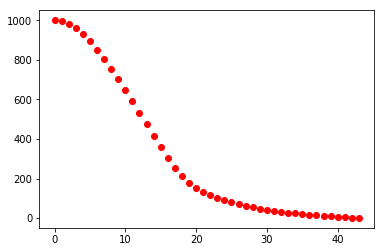

In [3]:
import rocket

%matplotlib inline
from matplotlib import pyplot as plt

R = rocket.Rocket()
while R.alive and not R.landed:
    
    R.y_thruster = np.abs(R.velocity[1])*1.08
    plt.plot(R.time,R.position[1],'ro')
        
    R.update()
    


LANDED: Glad that's over.


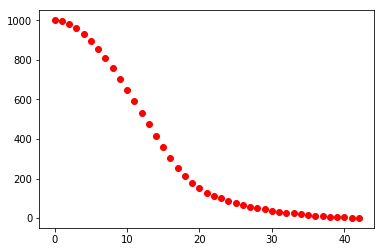

In [4]:
import rocket

%matplotlib inline
from matplotlib import pyplot as plt

R = rocket.Rocket()
while R.alive and not R.landed:
    
    #R.y_thruster = np.abs(R.velocity[1])*1.08
    
    ## High altitude regime
    if R.position[1] > 100:
        R.y_thruster = (2-R.velocity[1])
    else:
        R.y_thruster = (0.5-R.velocity[1])

    plt.plot(R.time,R.position[1],'ro')
        
    R.update()
    



LANDED: Make sure you put on your space helmet before going outside.


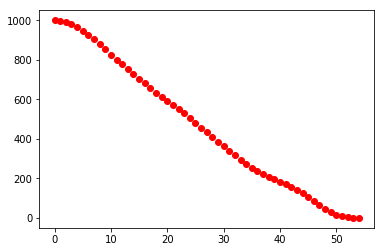

In [5]:
R = rocket.Rocket()
while R.alive and not R.landed:
    
    R.y_thruster = 100
    if R.position[1] < 800:
        R.y_thruster = 30

    if R.position[1] < 700:
        R.y_thruster = 25
    
    if R.position[1] < 600:
        R.y_thruster = 12.
    
    if R.position[1] < 500:
        R.y_thruster = 10.
    
    if R.position[1] < 400:
        R.y_thruster = 6.
    
    if R.position[1] < 250:
        R.y_thruster = 3.
    
    if R.position[1] < 180:
        R.y_thruster = 1.5
    
    if R.position[1] < 10:
        R.y_thruster = .9
        
    if R.position[1] < 2:
        R.y_thruster = 0.6
    
    plt.plot(R.time,R.position[1],'ro')
    
    R.update()
    
    

    

LANDED: Glad that's over.


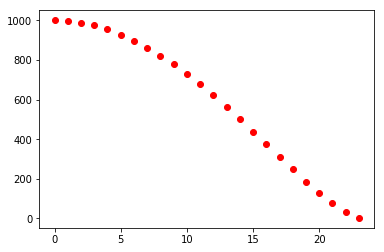

In [6]:
R = rocket.Rocket()
R.y_thruster=37.1
while R.alive and not R.landed:
    plt.plot(R.time,R.position[1], "ro")    
    R.update()

LANDED: Make sure you put on your space helmet before going outside.


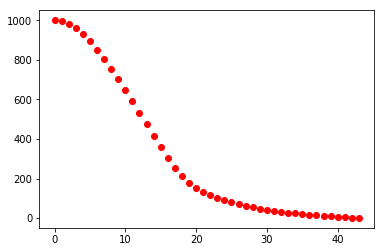

In [7]:

R = rocket.Rocket()
while R.alive and not R.landed:
    
    R.y_thruster = np.abs(R.velocity[1])*1.08
    
    plt.plot(R.time,R.position[1],'ro')
        
    R.update()
    